In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
print("Training the model...")
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Training the model...
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5590 - loss: 1.4430 - val_accuracy: 0.8929 - val_loss: 0.3776
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8923 - loss: 0.3678 - val_accuracy: 0.9084 - val_loss: 0.3085
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9071 - loss: 0.3161 - val_accuracy: 0.9204 - val_loss: 0.2722


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9069 - loss: 0.3076

Test Accuracy: 0.92


In [16]:
predictions = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


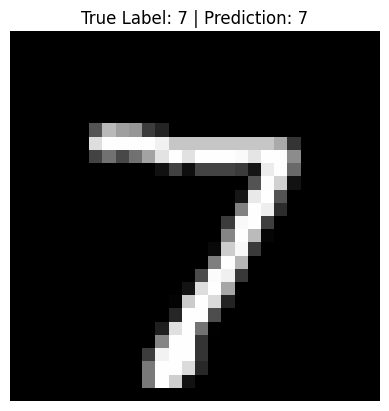

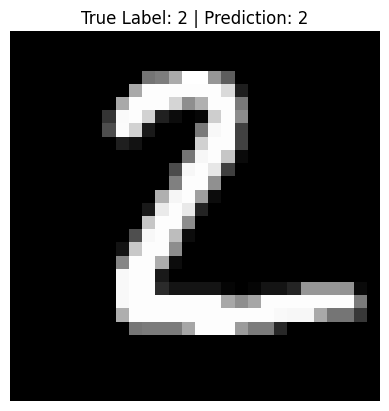

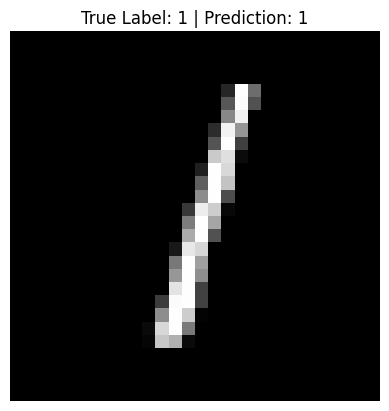

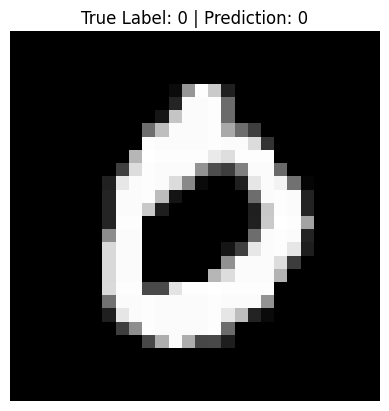

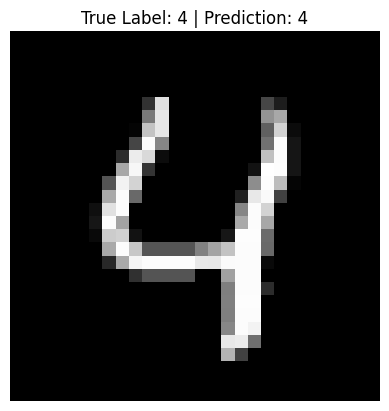

In [17]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {y_test[i]} | Prediction: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()